In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

### Read In Data

In [2]:
titanic = pd.read_csv("data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Drop all continuous features except Survived
cont_feat = ['PassengerId', 'Pclass', 'Age', 'Parch', 'Fare']
titanic.drop(cont_feat, axis=1, inplace=True)
titanic.head()

,Survived,Name,Sex,SibSp,Ticket,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,1,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,PC 17599,C85,C
2,1,"Heikkinen, Miss. Laina",female,0,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,113803,C123,S
4,0,"Allen, Mr. William Henry",male,0,373450,NaN,S


### Explore Categorical Features

In [4]:
# check if there are any missing values
titanic.isnull().sum()

Survived      0
Name          0
Sex           0
SibSp         0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [5]:
# Explor the number of unique values for each feature
for col in titanic.columns:
    print('{} : {} unique values'.format(col, titanic[col].nunique()))

Survived : 2 unique values
Name : 891 unique values
Sex : 2 unique values
SibSp : 7 unique values
Ticket : 681 unique values
Cabin : 147 unique values
Embarked : 3 unique values


In [6]:
# Check survival rate by gender
titanic.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [7]:
# Check survival rate by the port departed from
titanic.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [8]:
# Is Cabin missing at random?
titanic.groupby(titanic['Cabin'].isnull()).mean()['Survived']

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [9]:
# Look at unique values for the Ticket feature
titanic['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [10]:
# create a title feature by parsing passenger name
titanic['Title_Raw'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic.head()

,Survived,Name,Sex,SibSp,Ticket,Cabin,Embarked,Title_Raw
0,0,"Braund, Mr. Owen Harris",male,1,A/5 21171,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,PC 17599,C85,C,Mrs
2,1,"Heikkinen, Miss. Laina",female,0,STON/O2. 3101282,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,113803,C123,S,Mrs
4,0,"Allen, Mr. William Henry",male,0,373450,NaN,S,Mr


In [11]:
# Look at survival rate by title
titanic.pivot_table('Survived', index=['Title_Raw', 'Sex'], aggfunc=['count', 'mean'])

count      mean
                    Survived  Survived
Title_Raw    Sex                      
Capt         male          1  0.000000
Col          male          2  0.500000
Don          male          1  0.000000
Dr           female        1  1.000000
             male          6  0.333333
Jonkheer     male          1  0.000000
Lady         female        1  1.000000
Major        male          2  0.500000
Master       male         40  0.575000
Miss         female      182  0.697802
Mlle         female        2  1.000000
Mme          female        1  1.000000
Mr           male        517  0.156673
Mrs          female      125  0.792000
Ms           female        1  1.000000
Rev          male          6  0.000000
Sir          male          1  1.000000
the Countess female        1  1.000000

### Plot Categorical Features

In [12]:
# create a title by parsing passenger name and create a cabin indicator variable
titanic['Title'] = titanic['Title_Raw'].apply(lambda x: x if x in ['Master', 'Miss', 'Mr', 'Mrs'] else 'Other')
titanic['Cabin_ind'] =np.where(titanic['Cabin'].isnull(), 0 ,1)
titanic.head()

,Survived,Name,Sex,SibSp,Ticket,Cabin,Embarked,Title_Raw,Title,Cabin_ind
0,0,"Braund, Mr. Owen Harris",male,1,A/5 21171,NaN,S,Mr,Mr,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,PC 17599,C85,C,Mrs,Mrs,1
2,1,"Heikkinen, Miss. Laina",female,0,STON/O2. 3101282,NaN,S,Miss,Miss,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,113803,C123,S,Mrs,Mrs,1
4,0,"Allen, Mr. William Henry",male,0,373450,NaN,S,Mr,Mr,0


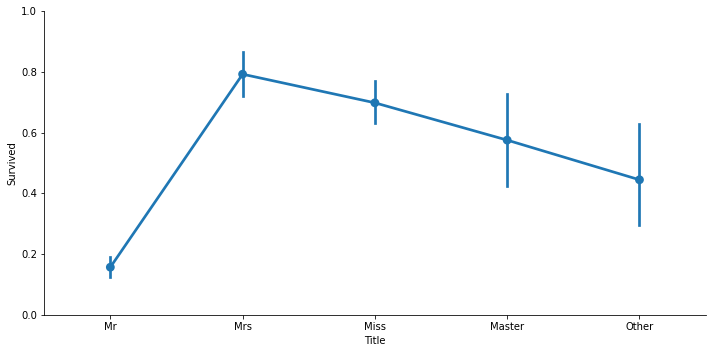

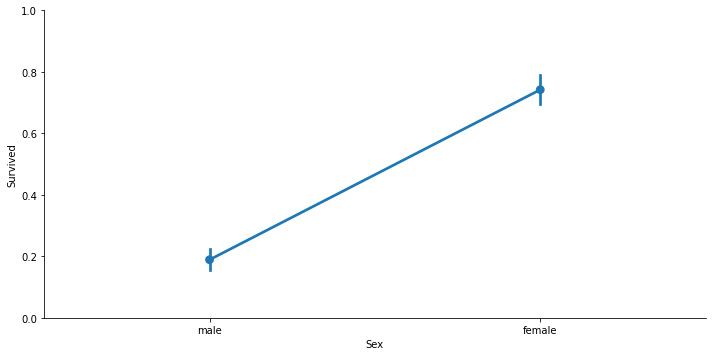

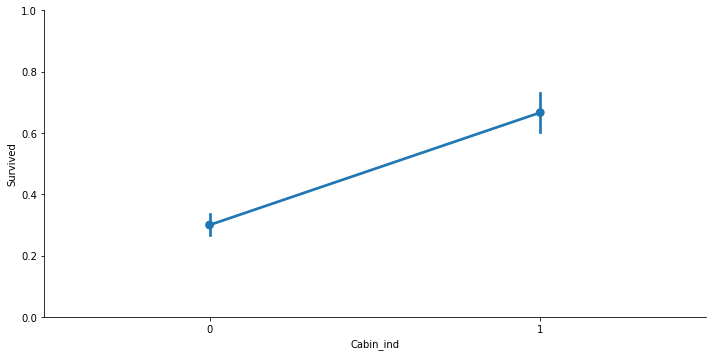

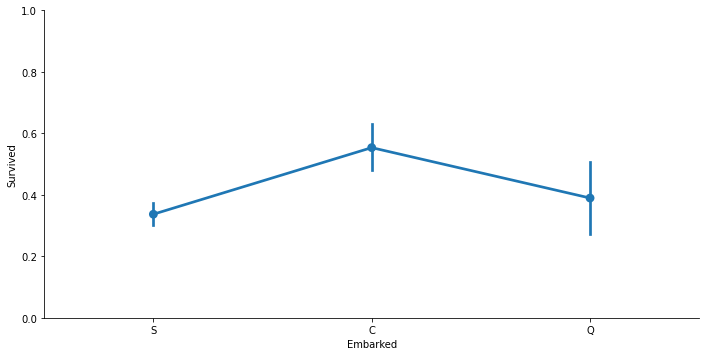

In [13]:
# Generate categrical plots for features
for col in ['Title', 'Sex', 'Cabin_ind', 'Embarked']:
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )
    plt.ylim(0, 1)

In [14]:
# split embarked by whether the passenger had a cabin
titanic.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129
